<a href="https://colab.research.google.com/github/noushadkhan01/ML-and-DL-by-SuperDataScience/blob/master/Machine-Learning/Part%202%20-%20Regression/Section%205%20-%20Multiple%20Linear%20Regression/Multiple_Regressions_on_50_Startup_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/noushadkhan01/ML-and-DL-by-SuperDataScience.git

Cloning into 'ML-and-DL-by-SuperDataScience'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 211 (delta 57), reused 201 (delta 53), pack-reused 0
Receiving objects: 100% (211/211), 24.79 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [0]:
%cd ML-and-DL-by-SuperDataScience/Machine-Learning/Part 2 - Regression/Section 5 - Multiple Linear Regression/

/content/ML-and-DL-by-SuperDataScience/Machine-Learning/Part 2 - Regression/Section 5 - Multiple Linear Regression


In [0]:
!ls

50_Startups.csv			multiple_linear_regression.py
data_preprocessing_template.py	multiple_linear_regression.R
data_preprocessing_template.R


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [0]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Evaluation Set

In [0]:
np.random.seed(2)
evaluation = df.loc[np.random.randint(0, len(df), 2, )]
evaluation

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
15,114523.61,122616.84,261776.23,New York,129917.04


In [0]:
evaluation.index.values

array([40, 15])

In [0]:
df = df.drop(evaluation.index.values)
df.shape

(48, 5)

In [0]:
X = df.drop('Profit', axis = 1)
X.head(1)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.8,471784.1,New York


## visualisation

In [0]:
import seaborn as sns

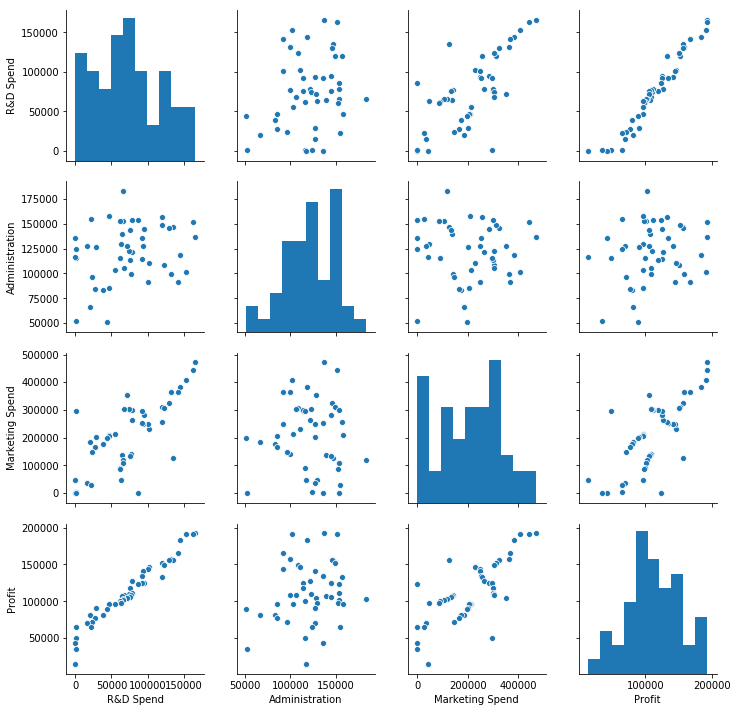

In [0]:
sns.pairplot(df)

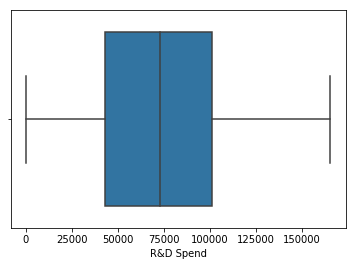

In [0]:
sns.boxplot('R&D Spend', data = df)

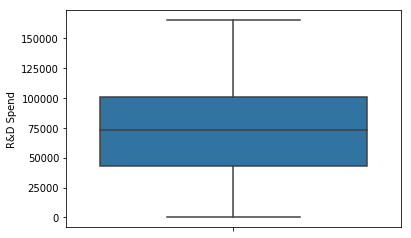

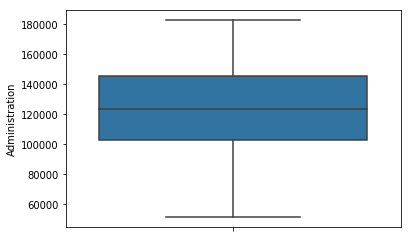

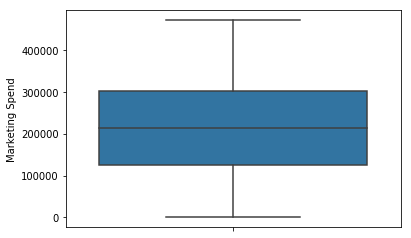

In [0]:
for i in df.columns[:-2]:
  sns.boxplot(y = i, data = df)
  plt.show()

## train_test_split

In [0]:
X = df.drop('Profit', 1)
X.head(1)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.8,471784.1,New York


In [0]:
y = df.Profit
y[:2]

0    192261.83
1    191792.06
Name: Profit, dtype: float64

## dummy_variable

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
le = LabelEncoder()
X.iloc[:, 3] = le.fit_transform(X.iloc[:, 3])
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [0]:
ohe = OneHotEncoder(categorical_features = [3], sparse = False, )
X = ohe.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X[:3]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05]])

### drop first

In [0]:
X = X[:, 1:]
X[:1]

array([[0.000000e+00, 1.000000e+00, 1.653492e+05, 1.368978e+05,
        4.717841e+05]])

In [0]:
y = df.iloc[:, -1:].values

In [0]:
y[:2]

array([[192261.83],
       [191792.06]])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [0]:
X_train[[2, 3]]

array([[0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
        2.1079767e+05],
       [1.0000000e+00, 0.0000000e+00, 6.6051520e+04, 1.8264556e+05,
        1.1814820e+05]])

In [0]:
y_train[:2]

array([[144259.4 ],
       [ 97427.84]])

# Train model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.9541394310086445

In [0]:
reg.score(X_test, y_test)

0.9436149440330112

# Predict for unseen Dataset

In [0]:
evaluation

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
15,114523.61,122616.84,261776.23,New York,129917.04


In [0]:
evaluation_X = evaluation.drop('Profit', 1)
evaluation_X

,R&D Spend,Administration,Marketing Spend,State
40,28754.33,118546.05,172795.67,California
15,114523.61,122616.84,261776.23,New York


In [0]:
evaluation_y = evaluation.Profit

In [0]:
evaluation_X.iloc[:, 3] = le.transform(evaluation_X.iloc[:, 3])
evaluation_X

,R&D Spend,Administration,Marketing Spend,State
40,28754.33,118546.05,172795.67,0
15,114523.61,122616.84,261776.23,2


In [0]:
evaluation_X = ohe.transform(evaluation_X)
evaluation_X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8754330e+04,
        1.1854605e+05, 1.7279567e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1452361e+05,
        1.2261684e+05, 2.6177623e+05]])

In [0]:
evaluation_X = evaluation_X[:, 1:]

In [0]:
reg.score(evaluation_X, evaluation_y)

0.7576735087074449

In [0]:
reg.predict(evaluation_X)

array([[ 73752.4288435 ],
       [147336.34199933]])

In [0]:
evaluation_y

40     78239.91
15    129917.04
Name: Profit, dtype: float64

# Backward Elimination

In [0]:
!pip install scipy==1.2

In [0]:
import statsmodels.formula.api as sm

## Step-1

**first we need to create a constant column to get an intercept to our model because the model we are creating by statsmodel do not create intercept by default**

In [0]:
X = np.append(np.ones((len(X), 1)).astype(int), values = X, axis = 1)
X[:2]

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05]])

### optimal features for our model

In [0]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_opt[:1]

array([[1.000000e+00, 0.000000e+00, 1.000000e+00, 1.653492e+05,
        1.368978e+05, 4.717841e+05]])

## Create model with all variables

In [0]:
def regressor_OLS(X_opt):
  regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
  print(regressor_OLS.summary())
  return regressor_OLS

In [0]:
regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 29 May 2019   Prob (F-statistic):           7.08e-27
Time:                        06:54:46   Log-Likelihood:                -503.43
No. Observations:                  48   AIC:                             1019.
Df Residuals:                      42   BIC:                             1030.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.998e+04   6781.711      7.370      0.0

## Step-3:
  

**Drop feature with highest p value greater than Significance Leval(SL)**

In [0]:
X_opt = X[:, [0, 2, 3, 4, 5]]
regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.47e-28
Time:                        06:54:56   Log-Likelihood:                -503.44
No. Observations:                  48   AIC:                             1017.
Df Residuals:                      43   BIC:                             1026.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.009e+04   6637.013      7.547      0.0

In [0]:
X_opt = X[:, [0, 3, 4, 5]]
opt_regressor = regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     301.0
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.50e-29
Time:                        06:55:06   Log-Likelihood:                -503.50
No. Observations:                  48   AIC:                             1015.
Df Residuals:                      44   BIC:                             1022.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.048e+04   6471.112      7.801      0.0

In [0]:
X_opt = X_opt[:, [0, 1, 3]]
opt_regressor = regressor_OLS(X_opt)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     457.4
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.25e-30
Time:                        06:55:10   Log-Likelihood:                -503.72
No. Observations:                  48   AIC:                             1013.
Df Residuals:                      45   BIC:                             1019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.677e+04   2678.544     17.462      0.0

#Backward Elimination by Recursive function

In [0]:
def my_regressor_OLS(X_opt, SL = 0.08):
  regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
  pvalues = regressor_OLS.pvalues
  if pvalues.max() > SL:
    max_pval_col = pvalues.argmax()
    X_opt = np.delete(X_opt, max_pval_col, 1)
    return my_regressor_OLS(X_opt)
  return regressor_OLS

In [0]:
opt_regressor = my_regressor_OLS(X)

In [0]:
opt_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     457.4
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.25e-30
Time:                        06:53:19   Log-Likelihood:                -503.72
No. Observations:                  48   AIC:                             1013.
Df Residuals:                      45   BIC:                             1019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.677e+04   2678.544     17.462      0.000    4.14e+04    5.22e+04
x1             0.8082      0.042     19.450      0.000       0.724       0.892
x2             0.0281      0.015      1.829      0.074      -0.003       0.059
==============================================================================
Omnibus:                       14.821   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.017
Skew:                          -0.917   Prob(JB):                     1.00e-05
Kurtosis:                       5.854   Cond. No.                     5.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By this we got that the most significan features are '**R & D spend** and **Marketing spend'**

# correlation matrix

In [0]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243551,0.725514,0.974490
Administration,0.243551,1.000000,-0.033269,0.200467
Marketing Spend,0.725514,-0.033269,1.000000,0.747638
Profit,0.974490,0.200467,0.747638,1.000000


In [0]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


By this we also got that the most significan features are '**R & D spend** and **Marketing spend'** with respect to profit

In [0]:
evaluation_X

array([[0.0000000e+00, 0.0000000e+00, 2.8754330e+04, 1.1854605e+05,
        1.7279567e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261684e+05,
        2.6177623e+05]])

In [0]:
evaluation_X = np.append(np.ones((len(evaluation_X), 1)).astype(int), values = evaluation_X, axis = 1)
evaluation_X[:2]

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8754330e+04,
        1.1854605e+05, 1.7279567e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1452361e+05,
        1.2261684e+05, 2.6177623e+05]])

remove columns 1, 2, 4

In [0]:
evaluation_X = np.delete(evaluation_X, [2, 4], 1)
evaluation_X

array([[1.0000000e+00, 0.0000000e+00, 2.8754330e+04, 1.7279567e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1452361e+05, 2.6177623e+05]])

In [0]:
evaluation_X = np.delete(evaluation_X, [1], 1)
evaluation_X

array([[1.0000000e+00, 2.8754330e+04, 1.7279567e+05],
       [1.0000000e+00, 1.1452361e+05, 2.6177623e+05]])

In [0]:
y_evaluation_ols = opt_regressor.predict(evaluation_X)

In [0]:
y_evaluation_ols

array([ 74864.65802953, 146681.62609026])

In [0]:
evaluation_y

40     78239.91
15    129917.04
Name: Profit, dtype: float64

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score(evaluation_y, y_evaluation_ols)

0.780984196841873

**slightly increased**